# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

In [100]:
# Loading the dataset which will be used throughout this assignmen
wine_data = pd.read_csv('wine.csv')

# Observing how the data looks like in a table
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,1
1,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1
2,6.6,0.695,0.00,2.1,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,0
3,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
4,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
794,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,0
795,6.9,0.510,0.23,2.0,0.072,13.0,22.0,0.99438,3.40,0.84,11.2,1
796,6.6,0.960,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,1
797,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,0


We see from the table view above that the shape of the data is 799 rows x 12 columns. In other words, we have

* 799 samples
* 12 features

In [101]:
# Observing a more detailed overview of the data.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  class                 799 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 75.0 KB


**To summarize, we have the following features in the dataset:**

* *column 0* = fixed acidity - continuous

* *column 1* = volatile acidity - continuous

* *column 2* = citric acid - continuous

* *column 3* = residual sugar - continuous

* *column 4* = chlorides - continuous

* *column 5* = free sulfur dioxide - continuous

* *column 6* = total sulfur dioxide - continuous

* *column 7* = density - continuous

* *column 8* = pH - continuous

* *column 9* = sulphates - continuous

* *column 10* = alcohol - continuous

* *column 11* = Class variable (1: wine class 1, 0: wine class 0) - categorical

Checking if there are any outliers present in the dataset

In [102]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
class                   0
dtype: int64

Observing the distribution of the values for some of the features

In [103]:
wine_data_class = pd.DataFrame(wine_data['class'].value_counts().reset_index().values, columns=['class', 'count'])

<AxesSubplot:xlabel='class', ylabel='count'>

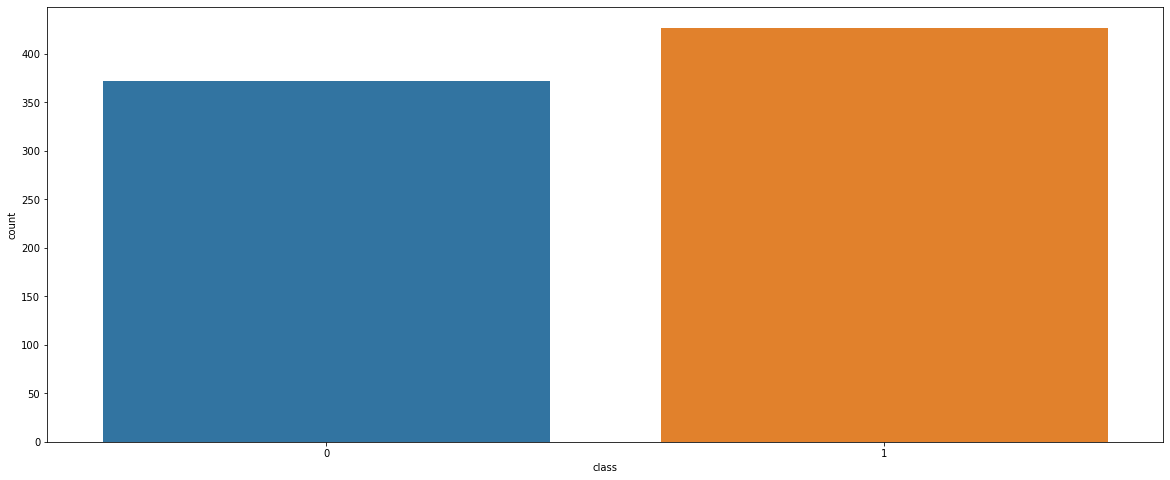

In [104]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=wine_data_class, x='class', y='count')

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

### Adaline

__Preprocessing:__

In [110]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)

            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [114]:
# Selecting Y to be what we want to predict
X = wine_data.loc[:399, wine_data.columns != 'class']
y = wine_data.loc[:399, wine_data.columns[-1]]

# Training Adaline model and plot cost functions
# ada_wine = AdalineGD(n_iter=50, eta=0.0001).fit(X_train, y_train)

In [117]:
ada_wine = AdalineGD(n_iter=15, eta= 0.0001)
ada_wine.fit(X, y)

ValueError: operands could not be broadcast together with shapes (400,) (400,11) 

__Training:__

In [ ]:
# Insert your code below
# ======================

### Perceptron

#### Preprocessing

#### Training:

## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn (Lenker til en ekstern side.). See below what the heatmaps should look like for the two classification algorithms.

In [ ]:
# Insert your code below
# ======================

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [ ]:
# Insert your code below
# ======================

## Discussion

The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?

__Insert your answer below__

=====================

---